In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import re
import konlpy
from wordcloud import WordCloud
from os import path
import requests 
from wordcloud import ImageColorGenerator
from collections import Counter
import nltk
import pickle
from nltk.corpus import stopwords

In [2]:
df = pd.read_csv("C:\\Users\\lsj32\\Desktop\\DSL\\DSL_2\\EDA\\ÌÇ§ÏõåÎìúÎ∂ÑÏÑù\\youtube_nodouble_unique.csv",lineterminator='\n')
df2017 = pd.read_csv("C:\\Users\\lsj32\\Desktop\\DSL\\DSL_2\\EDA\\ÌÇ§ÏõåÎìúÎ∂ÑÏÑù\\youtube_2017unique.csv",lineterminator='\n')
dfus = pd.read_csv("C:\\Users\\lsj32\\Desktop\\DSL\\DSL_2\\EDA\\ÌÇ§ÏõåÎìúÎ∂ÑÏÑù\\youtube_USunique.csv",lineterminator='\n')

df = df[['video_id','title','tags','category_name']]
df2017 = df2017[['video_id','title','tags','category_name']]
dfus = dfus[['video_id','title','tags','category_name']]

In [3]:
import matplotlib.font_manager as fm
path = 'C:\\Users\\lsj32\\AppData\\Local\\Microsoft\\Windows\\Fonts\\NanumBarunGothic.ttf'  # ÏÑ§ÏπòÎêú ÎÇòÎàîÍ∏ÄÍº¥Ï§ë ÏõêÌïòÎäî ÎÖÄÏÑùÏùò Ï†ÑÏ≤¥ Í≤ΩÎ°úÎ•º Í∞ÄÏ†∏Ïò§Ïûê
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

NanumBarunGothic


# title text Î∂ÑÏÑù

categoryÍ∞Ä 'Entertainment'Ïù∏ Í≤ΩÏö∞Ïóê ÎåÄÌïú title ÎπàÎèÑÎ∂ÑÏÑùÏùÑ Î®ºÏ†Ä ÏßÑÌñâÌïòÍ≤†ÏäµÎãàÎã§!  

In [4]:
df['category_name'].unique()

array(['Entertainment', 'Film & Animation', 'People & Blogs', 'Music',
       'Comedy', 'Education', 'News & Politics', 'Sports',
       'Nonprofits & Activism', 'Gaming', 'Travel & Events',
       'Pets & Animals', 'Science & Technology', 'Howto & Style',
       'Autos & Vehicles'], dtype=object)

In [5]:
import matplotlib.font_manager as fm
path = 'C:\\Users\\lsj32\\AppData\\Local\\Microsoft\\Windows\\Fonts\\NanumBarunGothic.ttf'  # ÏÑ§ÏπòÎêú ÎÇòÎàîÍ∏ÄÍº¥Ï§ë ÏõêÌïòÎäî ÎÖÄÏÑùÏùò Ï†ÑÏ≤¥ Í≤ΩÎ°úÎ•º Í∞ÄÏ†∏Ïò§Ïûê
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

NanumBarunGothic


In [6]:
import nltk
nltk.download('stopwords')
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lsj32\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
#titlesÏùÑ Î™®Îëê Ìïú Î¶¨Ïä§Ìä∏Ïóê Îã¥Îäî Í≥ºÏ†ïÏûÖÎãàÎã§.
titles=[]
titles_2017 = []
titles_us = []

#reset_indexÎ•º ÌïòÎäî Ïù¥Ïú†Îäî, forÎ¨∏ÏùÑ ÎèåÎ¶¨Í∏∞ ÏúÑÌï¥ÏÑúÏûÖÎãàÎã§!
df_entertainment = df[df['category_name']=='Comedy'].reset_index()
df_entertainment_2017 = df2017[df2017['category_name']=='Comedy'].reset_index()
df_entertainment_us = dfus[dfus['category_name']=='Comedy'].reset_index()

for i in range (0,len(df_entertainment)):
  titles.append(df_entertainment['title'][i]) #ÏöîÏÜåÎ•º ÌïòÎÇòÌïòÎÇòÏî© listÏóê Îã¥ÏäµÎãàÎã§!
for i in range (0,len(df_entertainment_2017)):
  titles_2017.append(df_entertainment_2017['title'][i])
for i in range (0,len(df_entertainment_us)):
  titles_us.append(df_entertainment_us['title'][i])

In [8]:
print(len(df_entertainment))
print(len(df_entertainment_2017))
print(len(df_entertainment_us))

984
829
1409


In [9]:
# Îí§ÏóêÏÑú ÏßÑÌñâÌï† ÌòïÌÉúÏÜå Î∂ÑÏÑùÏùÑ ÏúÑÌï¥ Î¶¨Ïä§Ìä∏Î•º Ìï¥Ï†úÌï¥Ï§çÎãàÎã§!
titles = "".join(titles)
titles_2017 = "".join(titles_2017)
titles_us = "".join(titles_us)
titles_us = re.sub(r'[^\.\?\!\w\d\s]','',titles_us)
titles_us = titles_us.lower()
print(titles_us)

when our generation gets old and hears a throwback song 5answering your assumptions about us... merrell twinssummer job! me and my best friend got an ice cream trucksurprising best friend with bubba gump shrimpmy decaying mind in quarantineuncle roger meet egg fried rice lady hersha patelswapping outfits with a drag queen!every drive thru evergrilled ribeye steak sausagewe secretly filmed the dolan twins  jeffs barbershopquesadillas  mexican survival guidei hate the i am not a robot verification.12 types of people on tiktoktipping delivery drivers 1000 dollars!!this is goodbyelet me inif 2020 gave us zombies instead of a pandemicif real people commercials were real life  chevy fuel efficiencygrizzly bearwhen you get on the grill for your friends birthdayhow hard fighting game combos used to bea zombie extras first day on set  key  peeledid late night tv change in 2020?surprising vlog squad with crazy tattoo game!!trump interview  a bad lip readingmail room  ep 16 delta farce  prehistor

In [10]:
#NanumBarunGothicÏ≤¥ ÌååÏùºÏùÑ ÎìúÎùºÏù¥Î∏åÏóê Ï†ÄÏû•Ìï¥Ï£ºÏãúÍ≥† Íº≠ Í∏ÄÏî®Ï≤¥ ÏúÑÏπòÎ•º ÏßÄÏ†ïÌï¥Ï£ºÏÖîÏïºÌï©ÎãàÎã§!
#ÌïúÍµ≠Ïñ¥Í∞Ä ÏßÄÏõêÎêòÎäî Ìè∞Ìä∏Î°ú ÏßÄÏ†ïÌï¥Ï£ºÏÑ∏Ïöî! Ï†Ä Í∞ôÏùÄ Í≤ΩÏö∞Îäî ÎÇòÎàîÎ∞îÎ•∏Í≥†ÎîïÏùÑ ÏÇ¨Ïö©ÌïòÏòÄÏäµÎãàÎã§.
FONT_PATH =  'C:\\Users\\lsj32\\AppData\\Local\\Microsoft\\Windows\\Fonts\\NanumBarunGothic.ttf'

## ÎØ∏Îì±Î°ù Îã®Ïñ¥ Î¨∏Ï†ú
Twitter (Okt) Ïù¥Ïö©

- ckonlpyÏóê Îì§Ïñ¥ÏûàÎäî Twitter Î™®ÎìàÏùÑ Ïù¥Ïö©ÌïòÎ©¥ ÏÇ¨Ï†ÑÏùÑ ÏßÅÏ†ë Ï∂îÍ∞Ä Í∞ÄÎä•
- add_dictionary Ìï®ÏàòÎ•º ÌÜµÌï¥ Ï∂îÍ∞ÄÌïòÎäî Í≤ÉÏùÄ Î©îÎ™®Î¶¨ ÏÉÅÏóê Ï°¥Ïû¨ÌïòÎäî ÏûÑÏãú ÏÇ¨Ï†ÑÏù¥ÎØÄÎ°ú Îß§Î≤à ÏÉàÎ°≠Í≤å Îì±Î°ùÌï¥Ïïº Ìï®
(Ï∂úÏ≤ò : 20210715_ÌÖçÏä§Ìä∏ÎßàÏù¥Îãù.ipynb)

In [11]:
#!pip install customized_konlpy

In [12]:
from ckonlpy.tag import Twitter #customize  konlpy
twitter = Twitter()

C:\Users\lsj32\anaconda3\lib\site-packages\konlpy\tag\_okt.py:17: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [13]:
# Ïù¥ Í≤ΩÏö∞ ÏúÑÏóêÏÑú Ìïú Î≤à Ï∂úÎ†•Ìï¥Î≥∏ Îí§Ïóê, 
# dictionaryÏóê ÌïòÎÇòÏùò ÌòïÌÉúÏÜåÎùºÍ≥† Ïù∏ÏãùÌï¥Ïïº ÌïòÎäî wordÎì§ÏùÑ ÌòïÌÉúÏÜåÏóê ÎßûÏ∂∞ÏÑú ÎÑ£Ïñ¥Ï£ºÏÑ∏Ïöî!
twitter.add_dictionary(['Ïò§ÏßïÏñ¥Í≤åÏûÑ', 'Î¨¥ÌïúÎèÑÏ†Ñ', 'Î¨∏Î™ÖÌäπÍ∏â','Ïú†ÌÄ¥Ï¶à','ÎÜÄÎ©¥ Î≠êÌïòÎãà','Ïñ¥Î™ΩÏñ¥Ïä§','ÏòÅÍµ≠ÎÇ®Ïûê'], 'Noun')
title_pos = twitter.pos(titles)
title_pos_2017 = twitter.pos(titles_2017)
print(title_pos_2017)

[('ÏäàÌçºÎ™®Îç∏', 'Noun'), ('4', 'Number'), ('ÌñâÏãú', 'Noun'), ('ÏàúÎ∞úÎ†•', 'Noun'), ('Ïã§Ìôî', 'Noun'), ('ÎÉê', 'Josa'), ('„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã', 'KoreanParticle'), ('____', 'Punctuation'), ('feat', 'Alpha'), ('.', 'Punctuation'), ('Í∞ïÌò∏Îèô', 'Noun'), ('The', 'Alpha'), ('MOST', 'Alpha'), ('DIFFICULT', 'Alpha'), ('Korean', 'Alpha'), ('SAT', 'Alpha'), ('English', 'Alpha'), ('+', 'Punctuation'), ('Maths', 'Alpha'), ('Questions', 'Alpha'), ('!!', 'Punctuation'), ('ÏΩîÌä∏', 'Noun'), ('Í¥¥Î¨º', 'Noun'), ('Ï∑®Í∏â', 'Noun'), ('ÌïòÎäî', 'Verb'), ('Ïó¨Ïûê', 'Noun'), ('ÎßåÎÇ®', 'Noun'), ('Í∞úÏõÉ', 'Adverb'), ('Í∏¥', 'Verb'), ('ÏïΩ', 'Modifier'), ('Îπ®Î∞©', 'Noun'), ('„Öã„Öã„Öã', 'KoreanParticle'), ('(', 'Punctuation'), ('ÎÖ∏Îûò', 'Noun'), ('ÌïòÎäî', 'Verb'), ('ÏΩîÌä∏', 'Noun'), (')[', 'Punctuation'), ('Î¶¨Ìîå', 'Noun'), (']', 'Punctuation'), ("'", 'Punctuation'), ('Ïä§', 'Noun'), ('ÎØ∏ÎÖ∏', 'Noun'), ('ÌîÑ', 'Noun'), ('ÏïÑÏù¥Ïä§', 'Noun'), ('ÌÜ°', 'Noun'), ("'", 'Punctuation'), ('ÏùÑ', 'J

In [14]:
#nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
title_pos_us = nltk.word_tokenize(titles_us) #ÌÜ†ÌÅ∞ÌôîÌïòÍ∏∞
title_pos_us = nltk.pos_tag(title_pos_us) #ÌòïÌÉúÏÜå Î∂ÑÏÑù
print(title_pos_us)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\lsj32\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


[('when', 'WRB'), ('our', 'PRP$'), ('generation', 'NN'), ('gets', 'VBZ'), ('old', 'JJ'), ('and', 'CC'), ('hears', 'VBZ'), ('a', 'DT'), ('throwback', 'NN'), ('song', 'NN'), ('5answering', 'CD'), ('your', 'PRP$'), ('assumptions', 'NNS'), ('about', 'IN'), ('us', 'PRP'), ('...', ':'), ('merrell', 'VB'), ('twinssummer', 'JJ'), ('job', 'NN'), ('!', '.'), ('me', 'PRP'), ('and', 'CC'), ('my', 'PRP$'), ('best', 'JJS'), ('friend', 'NN'), ('got', 'VBD'), ('an', 'DT'), ('ice', 'NN'), ('cream', 'NN'), ('trucksurprising', 'VBG'), ('best', 'JJS'), ('friend', 'NN'), ('with', 'IN'), ('bubba', 'JJ'), ('gump', 'NN'), ('shrimpmy', 'NN'), ('decaying', 'VBG'), ('mind', 'NN'), ('in', 'IN'), ('quarantineuncle', 'NN'), ('roger', 'NN'), ('meet', 'NN'), ('egg', 'NN'), ('fried', 'VBD'), ('rice', 'NN'), ('lady', 'NN'), ('hersha', 'NN'), ('patelswapping', 'VBG'), ('outfits', 'NNS'), ('with', 'IN'), ('a', 'DT'), ('drag', 'NN'), ('queen', 'NN'), ('!', '.'), ('every', 'DT'), ('drive', 'NN'), ('thru', 'NN'), ('evergril

In [15]:
print(('Î¨¥ÌïúÎèÑÏ†Ñ','Noun') in title_pos)
print(('Ïò§ÏßïÏñ¥Í≤åÏûÑ','Noun') in title_pos)
print(('Î¨∏Î™ÖÌäπÍ∏â','Noun') in title_pos)
print(('Ïú†ÌÄ¥Ï¶à','Noun') in title_pos)

False
True
False
False


## ÌòïÌÉúÏÜå Î∂ÑÏÑù

In [16]:
# ÏúÑÏóêÏÑúÏôÄ ÎèôÏùºÌïòÍ≤å ÏßÑÌñâÌï©ÎãàÎã§!
# ÌòπÏãúÎÇò Î∂ÄÏÇ¨Í∞ôÏùÄ Í≤ÉÎèÑ Ï∂îÍ∞ÄÌïòÎäî Í≤å Ï¢ãÍ≤†Îã§ Ïã∂ÏúºÎ©¥ Ï∂îÍ∞ÄÌï¥Ï£ºÏãúÎ©¥ Îê©ÎãàÎã§.

title_f = list([word for word, pos in title_pos if (pos=='Noun')|(pos=='Verb')|(pos=='Adjective')])
title_f_2017 = list([word for word, pos in title_pos_2017 if (pos=='Noun')|(pos=='Verb')|(pos=='Adjective')])
n_v_a_word = []
for word, pos in title_pos_us:
    if 'NN' in pos:
        n_v_a_word.append(word)
    elif 'VB' in pos:
        n_v_a_word.append(word)
    elif 'JJ' in pos:
        n_v_a_word.append(word)
    else: pass


In [18]:
#ÏúÑÏóêÏÑúÏôÄ ÎèôÏùºÌïòÍ≤å ÏßÑÌñâÎêòÏßÄÎßå, ÏúÑÏóêÏÑú ÌôïÏù∏Ìïú Îçî ÌïÑÏöîÏóÜÎäî Îã®Ïñ¥Îì§ÏùÑ Ï∂îÍ∞ÄÏ†ÅÏúºÎ°ú ÌôïÏù∏Ìï¥ÏÑú ÏóÜÏï†Ï£ºÏÑ∏Ïöî.
#Îã®Ïñ¥Í∞Ä ÌïÑÏöîÏóÜÎäî Í±∞Îäî stop_wordsÏóê ÎÑ£Ïñ¥Ï£ºÍ≥†, Ïù¥ÎØ∏ ÏúÑÏóêÏÑú ÌïúÏûêÎ¶¨Îã®Ïñ¥Îäî ÌïÑÏöîÏóÜÏúºÎãà len(word)==1Ïù¥Î©¥ Ï†úÍ±∞Ìï¥Ï£ºÎäî ÏΩîÎìúÎ•º ÏÇ¨Ïö©Ìï©ÎãàÎã§!
stop_words_kr = ['Ìï©ÎãàÎã§','Ìï¥Ï£ºÏÑ∏Ïöî','ÌïúÎã§','ÏûÖÎãàÎã§','ÌïòÎäî','ÌïòÎãà','ÍπåÏßÄ']
unique_title = set(title_f) #Ï§ëÎ≥µÎêòÎäî Îã®Ïñ¥Îì§ÏùÑ ÏóÜÏï§ Î≤ÑÏ†ÑÏù¥ unique_titleÏûÖÎãàÎã§.
unique_title_2017 = set(title_f_2017) #Ï§ëÎ≥µÎêòÎäî Îã®Ïñ¥Îì§ÏùÑ ÏóÜÏï§ Î≤ÑÏ†ÑÏù¥ unique_titleÏûÖÎãàÎã§.
for word in unique_title:
    if word in stop_words_kr or len(word) == 1:
        while word in title_f:
            title_f.remove(word) #stop_wordsÏóê Ìï¥ÎãπÎêòÍ±∞ÎÇò Ìïú ÏûêÎ¶¨ Ïà´ÏûêÏùò Îã®Ïñ¥Î•º titles_fÏóêÏÑú Ï†úÍ±∞
for word in unique_title_2017:
    if word in stop_words_kr or len(word) == 1:
        while word in title_f_2017:
            title_f_2017.remove(word) #stop_wordsÏóê Ìï¥ÎãπÎêòÍ±∞ÎÇò Ìïú ÏûêÎ¶¨ Ïà´ÏûêÏùò Îã®Ïñ¥Î•º titles_fÏóêÏÑú Ï†úÍ±∞

stop_words.append('im')
stop_words.append('none')#Ïù¥ÏÉÅÌïú Í±∞ Ï∂îÍ∞ÄÌï¥Ï£ºÍ∏∞
unique_word = set(n_v_a_word)
for word in unique_word:
    if word in stop_words or len(word) == 1:
        while word in n_v_a_word:
            n_v_a_word.remove(word)

In [19]:
c = Counter(title_f)
c_2017 = Counter(title_f_2017)
c_us = Counter(n_v_a_word)

## ÏõåÎìúÌÅ¥ÎùºÏö∞Îìú

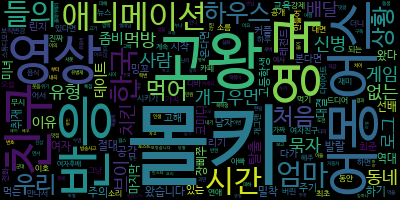

In [20]:
# ÎìúÎîîÏñ¥ ÏõåÎìúÌÅ¥ÎùºÏö∞ÎìúÎ•º ÏÉùÏÑ±Ìï¥Î≥¥ÏïÑÏöî!
wordcloud = WordCloud(
    font_path=FONT_PATH,
    #background_color="white",
    #   random_state=1,
)
wordcloud.generate_from_frequencies(c)
wordcloud.to_image()

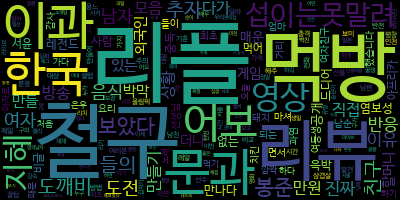

In [21]:
wordcloud_2017 = WordCloud(
    font_path=FONT_PATH,
    #background_color="white",
    #   random_state=1,
)
wordcloud_2017.generate_from_frequencies(c_2017)
wordcloud_2017.to_image()

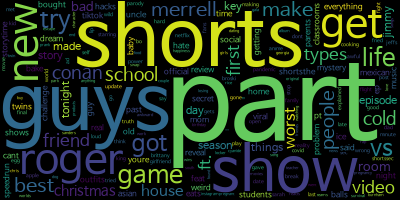

In [22]:
wordcloud_us = WordCloud(
    font_path=FONT_PATH,
    #background_color="white",
    #   random_state=1,
)
wordcloud_us.generate_from_frequencies(c_us)
wordcloud_us.to_image()

ÏòÅÏñ¥Îäî ÎåÄÏ∞∏ÏÇ¨..... trailer Ïù¥Îü∞Í±∞Îßå ÏûàÏùå Ïñ¥Ï©åÎùºÍ≥† !!!!!!!!

## ÎßâÎåÄÍ∑∏ÎûòÌîÑ ÏÉùÏÑ±

In [23]:
#ÎßâÎåÄÍ∑∏ÎûòÌîÑÎ°ú ÎπàÎèÑ ÏâΩÍ≤å Î¥ÖÏãúÎã§!!!!
tot_title=pd.DataFrame({
    "word":title_f
})
tot_title['count']=1
tot_title=tot_title.groupby(by=['word'],as_index=False).count()
tot_title=tot_title.sort_values(by='count',ascending=False).head(30)


#ÎßâÎåÄÍ∑∏ÎûòÌîÑÎ°ú ÎπàÎèÑ ÏâΩÍ≤å Î¥ÖÏãúÎã§!!!!
tot_title_2017 = pd.DataFrame({
    "word":title_f_2017
})
tot_title_2017['count']=1
tot_title_2017 = tot_title_2017.groupby(by=['word'],as_index=False).count()
tot_title_2017 = tot_title_2017.sort_values(by='count',ascending=False).head(30)

tot_title_us = pd.DataFrame({
    "word":n_v_a_word
})

tot_title_us['count']=1
tot_title_us = tot_title_us.groupby(by=['word'],as_index=False).count()
tot_title_us = tot_title_us.sort_values(by='count',ascending=False).head(30)
tot_title_us

word  count
1890       part     40
2382     shorts     36
1132       guys     35
2449       show     28
2210      roger     24
1775        new     24
1054        get     23
1017       game     23
1481       life     22
2903        try     22
1098        got     20
3020         vs     20
234        best     19
1567       make     19
1634    merrell     19
1922     people     17
2298     school     16
511       conan     16
485        cold     16
945       first     15
2935      types     15
2987      video     15
988      friend     15
3128      worst     14
1000        ft.     14
457   christmas     13
1236      house     13
1557       made     12
1359      jimmy     12
826     episode     12

In [24]:
tot_title_2017

word  count
710       Î¶¨Ìîå     68
2238      Ï≤†Íµ¨     57
814       Î®πÎ∞©     49
704       Î¶¨Î∑∞     39
1851      Ïù¥Í≥º     38
898       Î¨∏Í≥º     37
2544      ÌïúÍµ≠     32
1619      Ïñ¥Î≥¥     31
1706      ÏòÅÏÉÅ     25
2162      ÏßÄÌòú     24
1311  ÏÑ≠Ïù¥ÎäîÎ™ªÎßêÎ†§     22
1094      Î¥âÏ§Ä     21
1072     Î≥¥ÏïòÎã§     21
617       Îì§Ïùò     20
2305      ÏπúÍµ¨     20
2280      Ï∂îÏûê     19
552      ÎèÑÍπ®ÎπÑ     19
564       ÎèÑÏ†Ñ     18
367       ÎÇ®Ïûê     17
1668      Ïó¨Ïûê     17
1836      ÏùåÏãù     17
2170      ÏßÑÏßú     16
1884      Ïù¥Ïú†     16
972       Î∞òÏùë     16
2164      ÏßÅÏ†ë     15
454       Îã§Í∞Ä     15
755      ÎßåÎì§Í∏∞     15
763       ÎßåÏõê     15
866       Î™®Ïùå     15
1255      ÏÉÅÌô©     15

In [25]:
tot_title

word  count
895      Î™∞Ïπ¥    131
158      Í≥†Ïôï     50
1010     Î∞òÏùë     42
1684   Ïñ¥Î™ΩÏñ¥Ïä§     40
1778     ÏòÅÏÉÅ     37
2456     ÏπúÍµ¨     35
1774     ÏòÅÍµ≠     35
1649  Ïï†ÎãàÎ©îÏù¥ÏÖò     27
1471     ÏãúÍ∞Ñ     26
2700     ÌïúÍµ≠     26
2684    ÌïòÏö∞Ïä§     23
1705     ÏóÑÎßà     23
648      Îì§Ïùò     23
1858     Ïö∞Î¶¨     22
2385     Ï≤òÏùå     21
75     Í∞úÍ∑∏Ïö∞Î®º     21
1321     ÏÉÅÌô©     21
1513     Ïã†Î≥ë     21
845      Î®πÏñ¥     21
923      Î¨µÏûê     21
844      Î®πÎ∞©     20
1264     ÏÇ¨Îûå     20
1049     Î∞∞Îã¨     20
584      ÎèôÎÑ§     19
1921     Ïú†Ìòï     19
1199     Î∏åÏù¥     19
113      Í≤åÏûÑ     19
719      Î°úÍ∑∏     19
1708     ÏóÜÎäî     19
2454     ÏπòÌÇ®     18

import matplotlib.font_manager as fm
path = '/content/drive/MyDrive/EDA/NanumBarunGothic.ttf'  # ÏÑ§ÏπòÎêú ÎÇòÎàîÍ∏ÄÍº¥Ï§ë ÏõêÌïòÎäî ÎÖÄÏÑùÏùò Ï†ÑÏ≤¥ Í≤ΩÎ°úÎ•º Í∞ÄÏ†∏Ïò§Ïûê
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

In [26]:
import seaborn as sns

<ipython-input-27-701081037421>:4: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, color='#999999',axis='y')


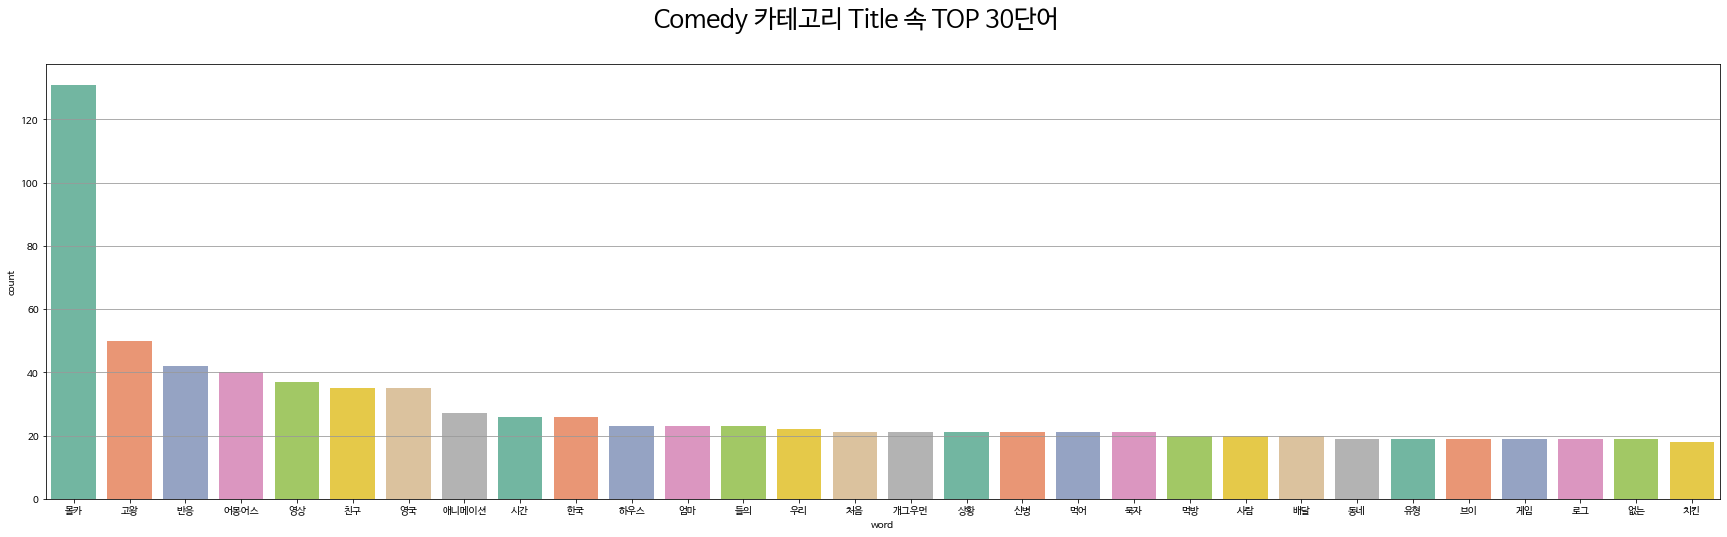

In [27]:
#plt.rc('font', family='NanumBarunGothic')
plt.figure(figsize=(30,8))
sns.barplot(x="word",y="count", data=tot_title,palette='Set2')
plt.grid(b=True, color='#999999',axis='y')
plt.suptitle('Comedy Ïπ¥ÌÖåÍ≥†Î¶¨ Title ÏÜç TOP 30Îã®Ïñ¥', size = 25)
plt.show()

<ipython-input-28-3cdeb7f96ed5>:4: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, color='#999999',axis='y')


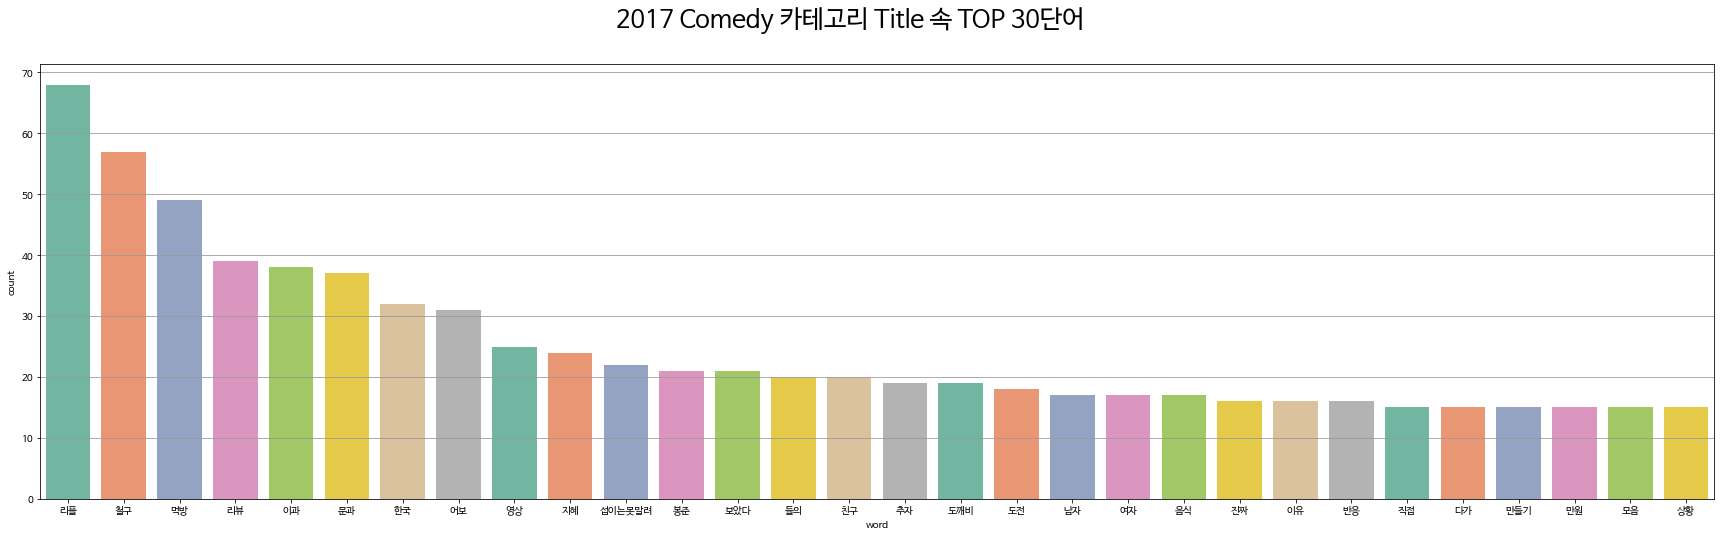

In [28]:
#plt.rc('font', family='NanumBarunGothic')
plt.figure(figsize=(30,8))
sns.barplot(x="word",y="count", data=tot_title_2017,palette='Set2')
plt.grid(b=True, color='#999999',axis='y')
plt.suptitle('2017 Comedy Ïπ¥ÌÖåÍ≥†Î¶¨ Title ÏÜç TOP 30Îã®Ïñ¥', size = 25)
plt.show()

<ipython-input-29-d9f08524cc8a>:4: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, color='#999999',axis='y')


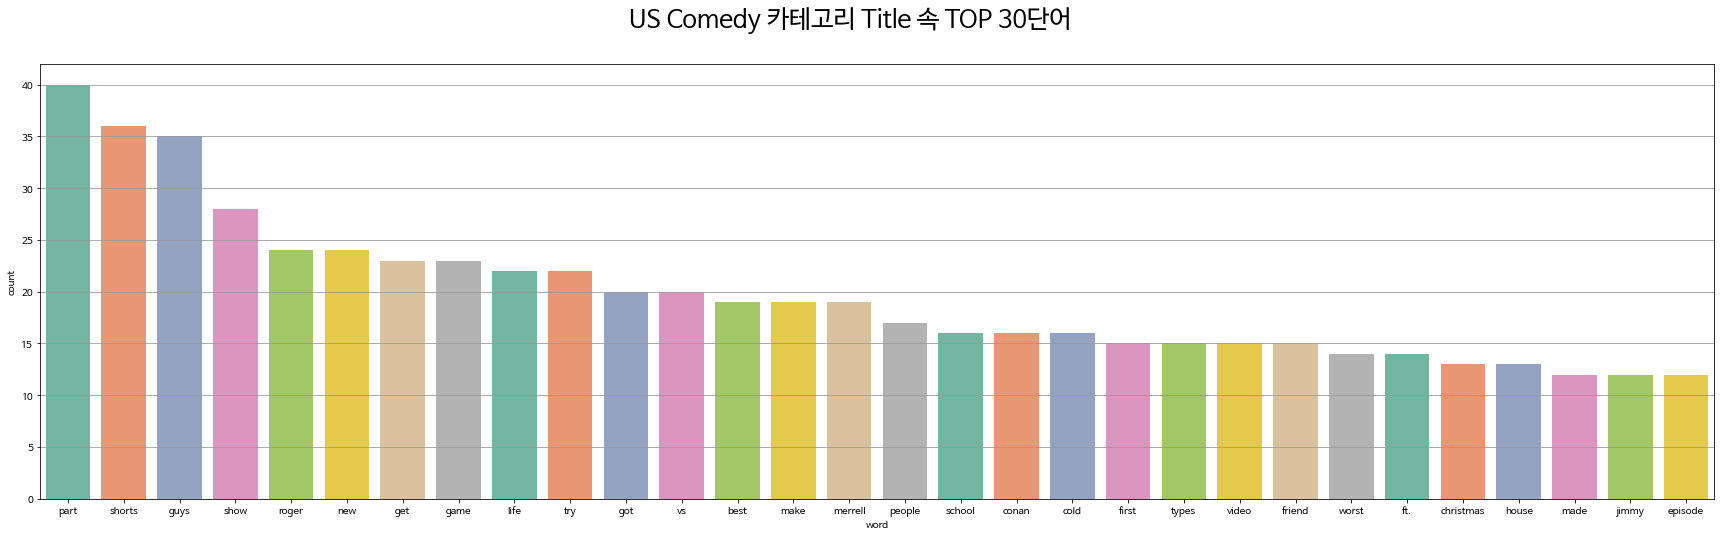

In [29]:
#plt.rc('font', family='NanumBarunGothic')
plt.figure(figsize=(30,8))
sns.barplot(x="word",y="count", data=tot_title_us,palette='Set2')
plt.grid(b=True, color='#999999',axis='y')
plt.suptitle('US Comedy Ïπ¥ÌÖåÍ≥†Î¶¨ Title ÏÜç TOP 30Îã®Ïñ¥', size = 25)
plt.show()

# tag Î∂ÑÏÑù

In [30]:
#titlesÏùÑ Î™®Îëê Ìïú Î¶¨Ïä§Ìä∏Ïóê Îã¥Îäî Í≥ºÏ†ïÏûÖÎãàÎã§.
tags=[]
tags_2017 = []
tags_us = []


for i in range (0,len(df_entertainment)):
  tags.append(df_entertainment['tags'][i]) #ÏöîÏÜåÎ•º ÌïòÎÇòÌïòÎÇòÏî© listÏóê Îã¥ÏäµÎãàÎã§!
for i in range (0,len(df_entertainment_2017)):
  tags_2017.append(df_entertainment_2017['tags'][i])
for i in range (0,len(df_entertainment_us)):
  tags_us.append(df_entertainment_us['tags'][i])

# Îí§ÏóêÏÑú ÏßÑÌñâÌï† ÌòïÌÉúÏÜå Î∂ÑÏÑùÏùÑ ÏúÑÌï¥ Î¶¨Ïä§Ìä∏Î•º Ìï¥Ï†úÌï¥Ï§çÎãàÎã§!
tags = "".join(tags)
tags_2017 = "".join(tags_2017)
tags_us = "".join(tags_us)
tags_us = re.sub(r'[^\.\?\!\w\d\s]',' ',tags_us)
tags_us = tags_us.lower()
print(tags_us)

#from ckonlpy.tag import Twitter #customize  konlpy
#twitter = Twitter()

tag_pos = twitter.pos(tags)
tag_pos_2017 = twitter.pos(tags_2017)

tag_pos_us = nltk.word_tokenize(tags_us) #ÌÜ†ÌÅ∞ÌôîÌïòÍ∏∞
tag_pos_us = nltk.pos_tag(tag_pos_us) #ÌòïÌÉúÏÜå Î∂ÑÏÑù

when our generation gets old and hears a throwback song 5 when our generation gets old and hears a throwback song when our generation gets old and hears a throwback song 3 when our generation gets old and hears a throwback song 4 kyle exum exum bassthoven generation old kyle tiktok trap 3 little pigs kyle exum parody songs starbucks be like gooba 6ix9ine blueberry faygo lil mosey apple be like songs old belt road mama mode parents be like exumseason tiktokin kylemerrell twins twins merrell veronica merrell vanessa merrell twin comedy family friendly assumptions about us assumptions veronica vanessa ronron identical twins addressing everything addressing the drama addressing the drama with my sisterdanandriya dan and riya dan riya types of tootsie dan   riya dan and riya parents funny comedy channel best friends summer job summer job ice cream ice cream truck comedy girls trip girls best friend summer date making money in the summer girl vs girl normal girl job working girl working girl

In [31]:
tag_f = list([word for word, pos in tag_pos if (pos=='Noun')|(pos=='Verb')|(pos=='Adjective')])
tag_f_2017 = list([word for word, pos in tag_pos_2017 if (pos=='Noun')|(pos=='Verb')|(pos=='Adjective')])
tag_word = []
for word, pos in tag_pos_us:
    if 'NN' in pos:
        tag_word.append(word)
    elif 'VB' in pos:
        tag_word.append(word)
    elif 'JJ' in pos:
        tag_word.append(word)
    else: pass

#stop_words_kr = ['Ìï©ÎãàÎã§','Ìï¥Ï£ºÏÑ∏Ïöî','ÌïúÎã§','ÏûÖÎãàÎã§','ÌïòÎäî','ÌïòÎãà']
unique_tag = set(tag_f) #Ï§ëÎ≥µÎêòÎäî Îã®Ïñ¥Îì§ÏùÑ ÏóÜÏï§ Î≤ÑÏ†ÑÏù¥ unique_titleÏûÖÎãàÎã§.
unique_tag_2017 = set(tag_f_2017) #Ï§ëÎ≥µÎêòÎäî Îã®Ïñ¥Îì§ÏùÑ ÏóÜÏï§ Î≤ÑÏ†ÑÏù¥ unique_titleÏûÖÎãàÎã§.
for word in unique_tag:
    if word in stop_words_kr or len(word) == 1:
        while word in tag_f:
            tag_f.remove(word) #stop_wordsÏóê Ìï¥ÎãπÎêòÍ±∞ÎÇò Ìïú ÏûêÎ¶¨ Ïà´ÏûêÏùò Îã®Ïñ¥Î•º titles_fÏóêÏÑú Ï†úÍ±∞
for word in unique_tag_2017:
    if word in stop_words_kr or len(word) == 1:
        while word in tag_f_2017:
            tag_f_2017.remove(word) #stop_wordsÏóê Ìï¥ÎãπÎêòÍ±∞ÎÇò Ìïú ÏûêÎ¶¨ Ïà´ÏûêÏùò Îã®Ïñ¥Î•º titles_fÏóêÏÑú Ï†úÍ±∞

#stop_words.append('im') #Ïù¥ÏÉÅÌïú Í±∞ Ï∂îÍ∞ÄÌï¥Ï£ºÍ∏∞
unique_tag_us = set(tag_word)
for word in unique_tag_us:
    if word in stop_words or len(word) == 1:
        while word in tag_word:
            tag_word.remove(word)

c_tag = Counter(tag_f)
c_tag_2017 = Counter(tag_f_2017)
c_tag_us = Counter(tag_word)

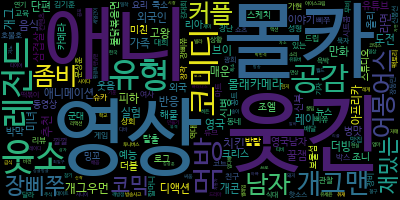

In [32]:
# ÎìúÎîîÏñ¥ ÏõåÎìúÌÅ¥ÎùºÏö∞ÎìúÎ•º ÏÉùÏÑ±Ìï¥Î≥¥ÏïÑÏöî!
wordcloud_tag = WordCloud(
    font_path=FONT_PATH,
    #background_color="white",
    #   random_state=1,
)
wordcloud_tag.generate_from_frequencies(c_tag)
wordcloud_tag.to_image()

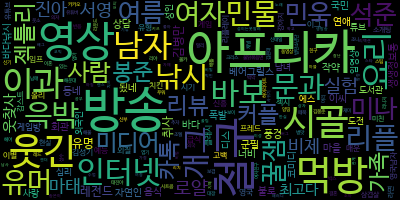

In [33]:
wordcloud_tag_2017 = WordCloud(
    font_path=FONT_PATH,
    #background_color="white",
    #   random_state=1,
)
wordcloud_tag_2017.generate_from_frequencies(c_tag_2017)
wordcloud_tag_2017.to_image()

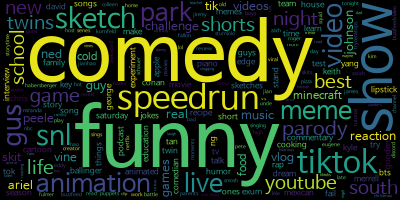

In [34]:
wordcloud_tag_us = WordCloud(
    font_path=FONT_PATH,
    #background_color="white",
    #   random_state=1,
)
wordcloud_tag_us.generate_from_frequencies(c_tag_us)
wordcloud_tag_us.to_image()

In [35]:
#ÎßâÎåÄÍ∑∏ÎûòÌîÑÎ°ú ÎπàÎèÑ ÏâΩÍ≤å Î¥ÖÏãúÎã§!!!!
tot_tag=pd.DataFrame({
    "word":tag_f
})
tot_tag['count']=1
tot_tag=tot_tag.groupby(by=['word'],as_index=False).count()
tot_tag=tot_tag.sort_values(by='count',ascending=False).head(30)


#ÎßâÎåÄÍ∑∏ÎûòÌîÑÎ°ú ÎπàÎèÑ ÏâΩÍ≤å Î¥ÖÏãúÎã§!!!!
tot_tag_2017 = pd.DataFrame({
    "word":tag_f_2017
})
tot_tag_2017['count']=1
tot_tag_2017 = tot_tag_2017.groupby(by=['word'],as_index=False).count()
tot_tag_2017 = tot_tag_2017.sort_values(by='count',ascending=False).head(30)

tot_tag_us = pd.DataFrame({
    "word":tag_word
})

tot_tag_us['count']=1
tot_tag_us = tot_tag_us.groupby(by=['word'],as_index=False).count()
tot_tag_us = tot_tag_us.sort_values(by='count',ascending=False).head(30)
tot_tag_us

word  count
1063     comedy    675
2126      funny    658
4937       show    246
5147   speedrun    240
5589     tiktok    214
5075        snl    161
5003     sketch    161
5904      video    155
3474       meme    144
2392        gus    139
3218       live    136
181   animation    136
3994       park    132
4001     parody    130
3789      night    123
5127      south    122
2176       game    118
6210    youtube    115
4919     shorts    111
3766        new    108
478        best    108
3187       life    106
5796      twins    104
4773     school    104
855   challenge    100
4401   reaction     98
2904    johnson     97
5016       skit     94
2394        guy     91
5908     videos     88

In [36]:
tot_tag_2017

word  count
1042    Î∞©ÏÜ°    425
1623  ÏïÑÌîÑÎ¶¨Ïπ¥    424
2387    Ï≤†Íµ¨    381
1788    ÏòÅÏÉÅ    341
836     Î®πÎ∞©    294
1880    ÏõÉÍ∏¥    253
1507    ÏãúÍ≥®    235
1981    Ïù¥Í≥º    208
1853    ÏöîÎ¶¨    195
406     ÎÇ®Ïûê    187
989     Î∞îÎ≥¥    177
2063   Ïù∏ÌÑ∞ÎÑ∑    177
1952    ÏúΩÎ∞ï    171
385     ÎÇöÏãú    160
65      Í∞úÍ∑∏    159
964     ÎØºÎ¨º    154
911     Î¨∏Í≥º    154
736     Î¶¨Ìîå    153
1919    Ïú†Î®∏    144
1750    Ïó¨Ïûê    142
1740    Ïó¨Î¶Ñ    123
1320    ÏÑùÏ§Ä    122
969     ÎØºÏö±    122
940     ÎØ∏ÎÇò    122
360     ÍøÄÏûº    121
946    ÎØ∏ÎîîÏñ¥    116
1236    ÏÇ¨Îûå    113
725     Î¶¨Î∑∞    107
2225   Ï†ùÌãÄÎ¶¨    107
2488    Ïª§Ìîå    104

In [37]:
tot_tag

word  count
1689     ÏõÉÍ∏¥    285
1598     ÏòÅÏÉÅ    279
760      Î™∞Ïπ¥    271
1478     Ïï†Îãà    261
1690     ÏõÉÏÜå    179
591     Î†àÏ†ÑÎìú    163
1745     Ïú†Ìòï    161
2292    ÏΩîÎØ∏Îîî    154
125      Í≥µÍ∞ê    145
722      Î®πÎ∞©    141
53      Í∞úÍ∑∏Îß®    116
331      ÎÇ®Ïûê    103
2268     Ïª§Ìîå    100
1511   Ïñ¥Î™ΩÏñ¥Ïä§     99
2030     Ï¢ÄÎπÑ     96
1926    Ïû•ÏÇêÏ≠à     95
2295     ÏΩîÎØπ     87
1936    Ïû¨Î∞åÎäî     85
759   Î™∞ÎûòÏπ¥Î©îÎùº     84
2206     Ï∂îÏ≤ú     83
52       Í∞úÍ∑∏     79
54     Í∞úÍ∑∏Ïö∞Î®º     79
2230     ÏπòÌÇ®     79
553      ÎùºÎ©¥     68
1657    Ïô∏Íµ≠Ïù∏     67
1479  Ïï†ÎãàÎ©îÏù¥ÏÖò     66
1458   ÏïÑÌîÑÎ¶¨Ïπ¥     65
1372     Ïã†Î≥ë     64
444      ÎçîÎπô     63
469      ÎèÑÏ†Ñ     62

<ipython-input-38-995e757e47be>:4: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, color='#999999',axis='y')


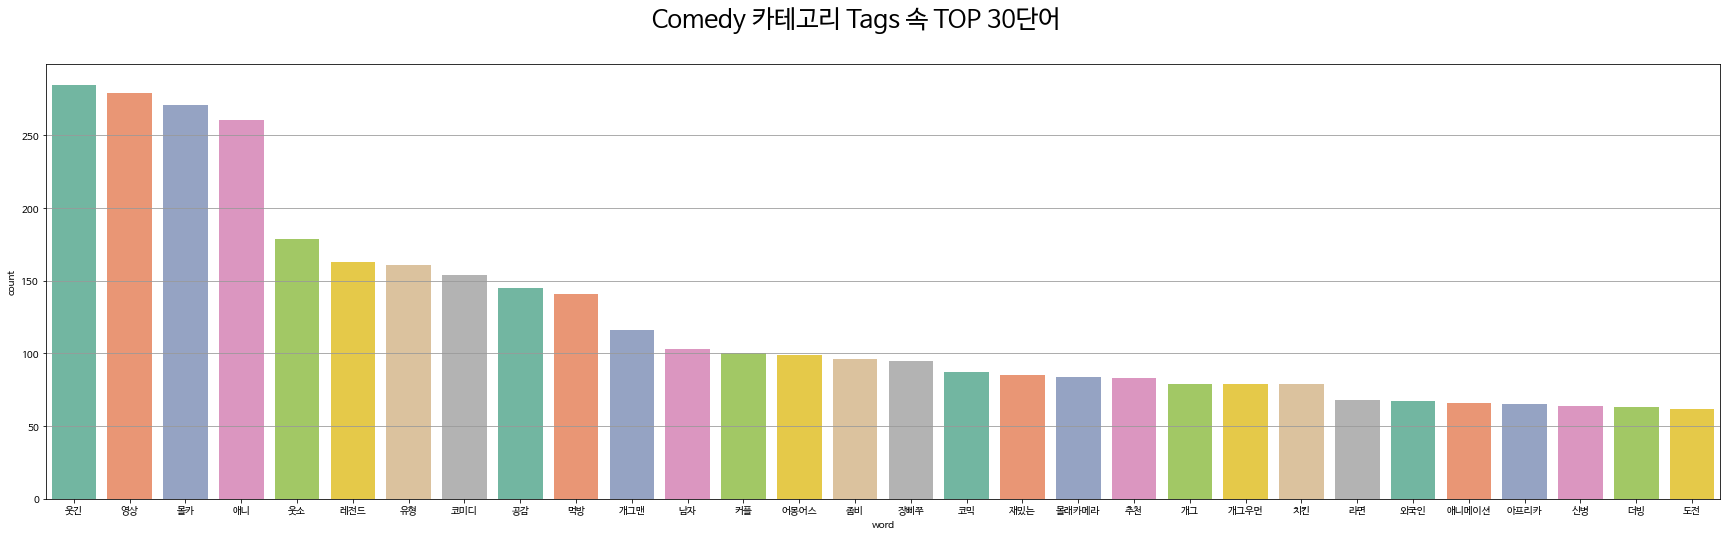

In [38]:
plt.rc('font', family='NanumBarunGothic')
plt.figure(figsize=(30,8))
sns.barplot(x="word",y="count", data=tot_tag,palette='Set2')
plt.grid(b=True, color='#999999',axis='y')
plt.suptitle('Comedy Ïπ¥ÌÖåÍ≥†Î¶¨ Tags ÏÜç TOP 30Îã®Ïñ¥', size = 25)
plt.show()

<ipython-input-39-9f0332099271>:3: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, color='#999999',axis='y')


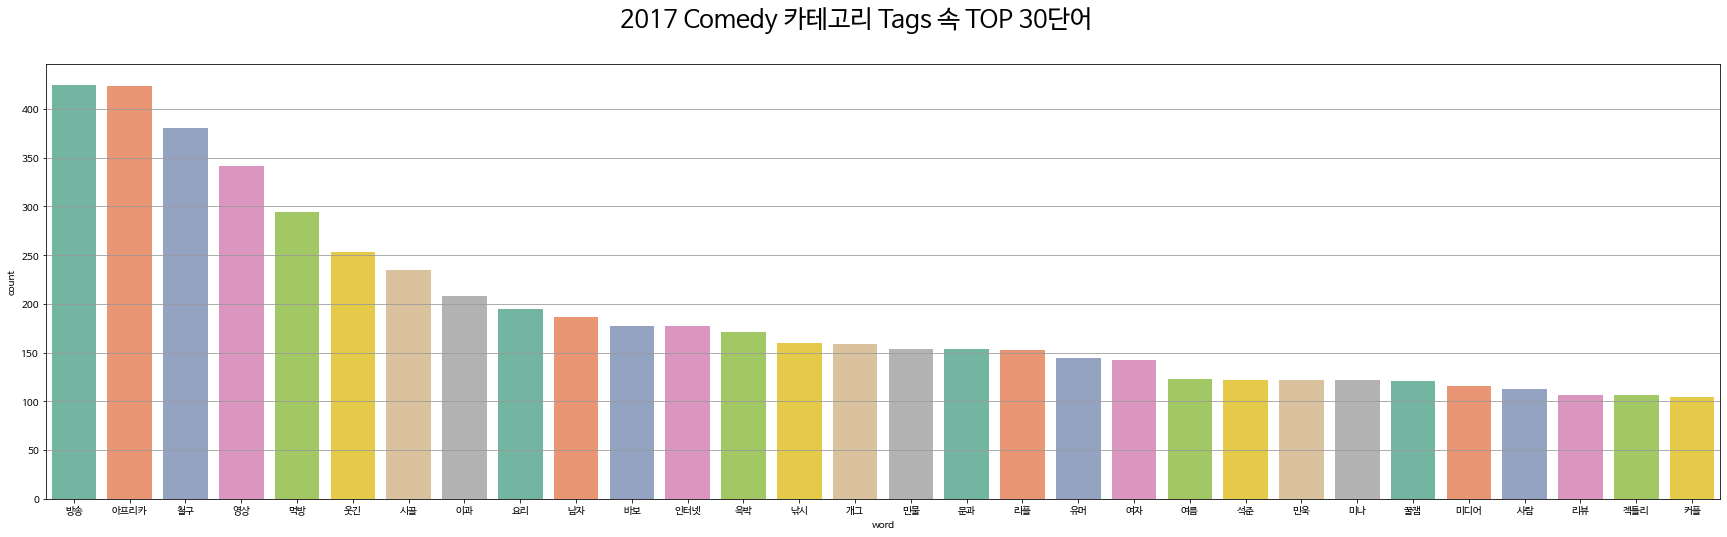

In [39]:
plt.figure(figsize=(30,8))
sns.barplot(x="word",y="count", data=tot_tag_2017,palette='Set2')
plt.grid(b=True, color='#999999',axis='y')
plt.suptitle('2017 Comedy Ïπ¥ÌÖåÍ≥†Î¶¨ Tags ÏÜç TOP 30Îã®Ïñ¥', size = 25)
plt.show()

<ipython-input-40-e78364ba94c3>:3: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, color='#999999',axis='y')


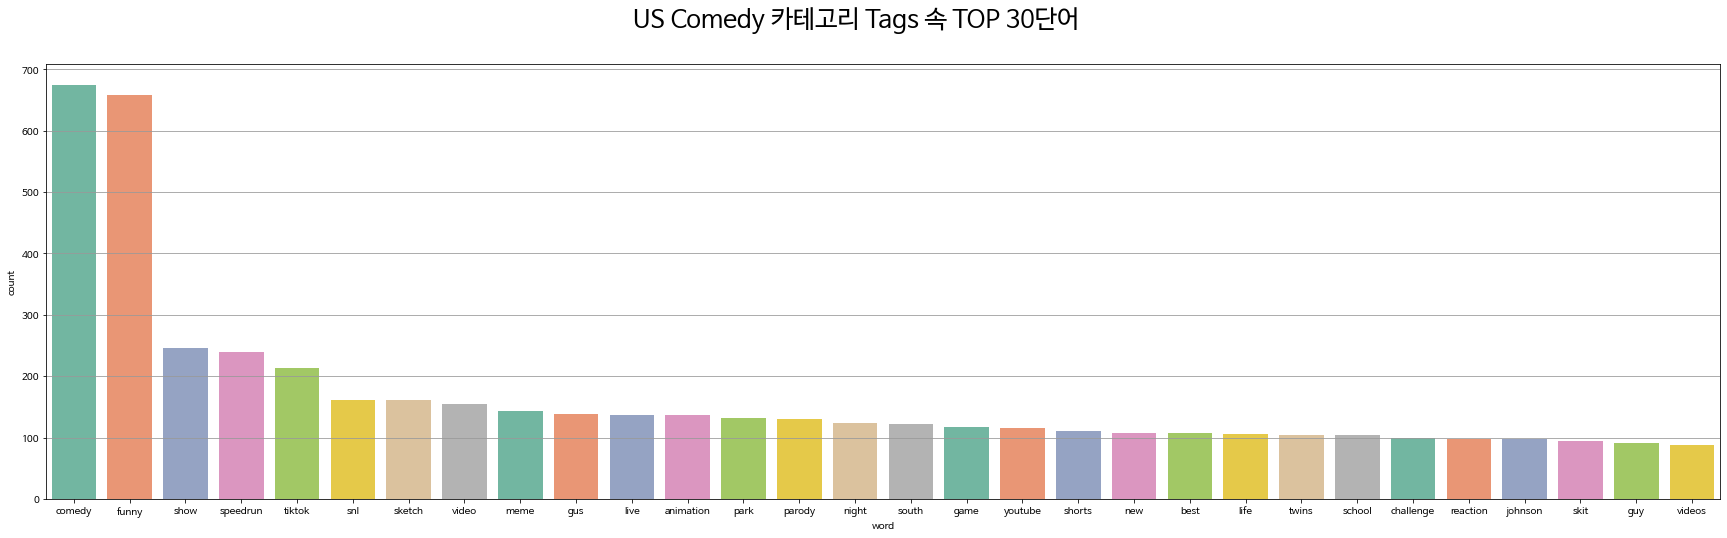

In [40]:
plt.figure(figsize=(30,8))
sns.barplot(x="word",y="count", data=tot_tag_us,palette='Set2')
plt.grid(b=True, color='#999999',axis='y')
plt.suptitle('US Comedy Ïπ¥ÌÖåÍ≥†Î¶¨ Tags ÏÜç TOP 30Îã®Ïñ¥', size = 25)
plt.show()